In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

In [2]:
df = pd.read_csv('hypertension_data.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [14]:
df.shape

(26083, 14)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(26058, 14)

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26058 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26058 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26058 non-null  int64  
 3   trestbps  26058 non-null  int64  
 4   chol      26058 non-null  int64  
 5   fbs       26058 non-null  int64  
 6   restecg   26058 non-null  int64  
 7   thalach   26058 non-null  int64  
 8   exang     26058 non-null  int64  
 9   oldpeak   26058 non-null  float64
 10  slope     26058 non-null  int64  
 11  ca        26058 non-null  int64  
 12  thal      26058 non-null  int64  
 13  target    26058 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.0 MB


<Axes: xlabel='target', ylabel='count'>

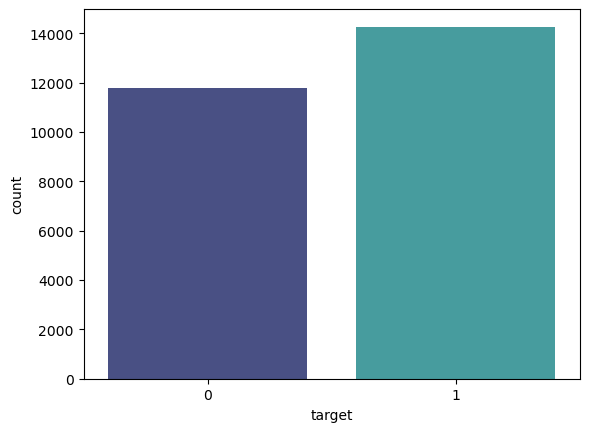

In [20]:
sns.countplot(x = 'target', data = df, palette='mako')

<Axes: >

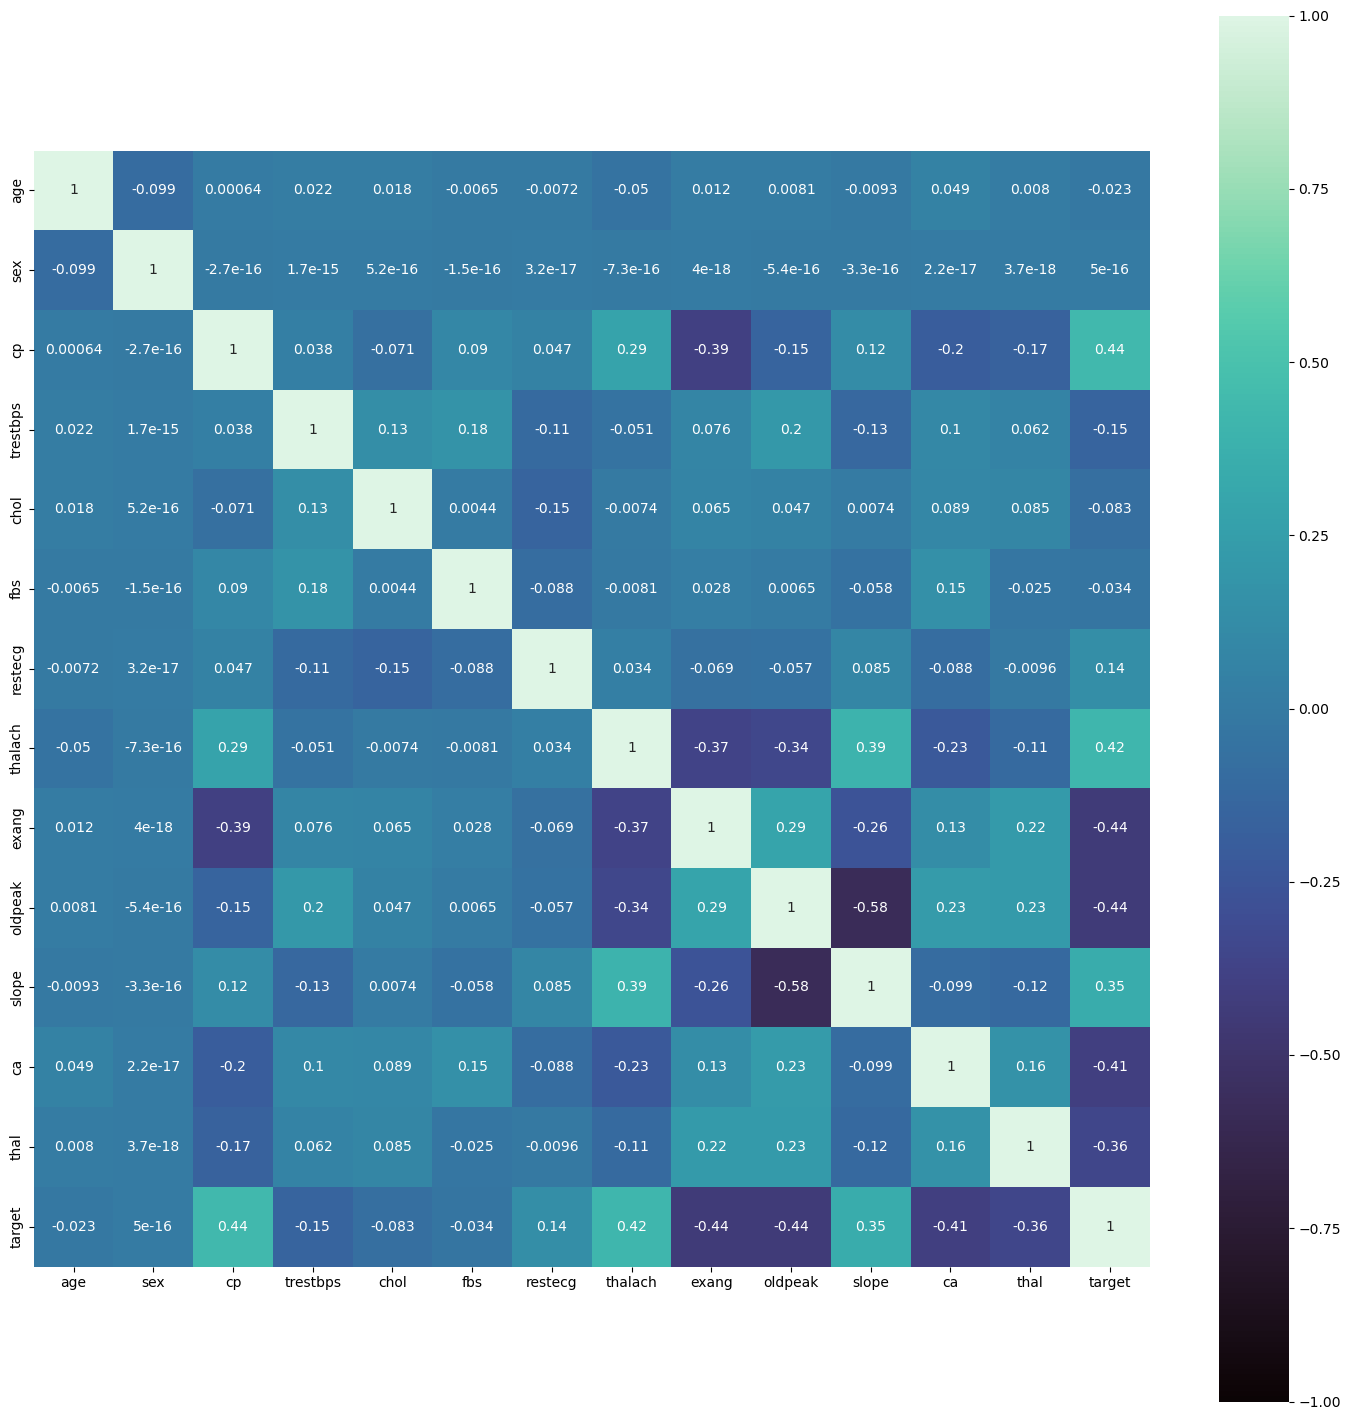

In [21]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='mako',annot=True, square=True)

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

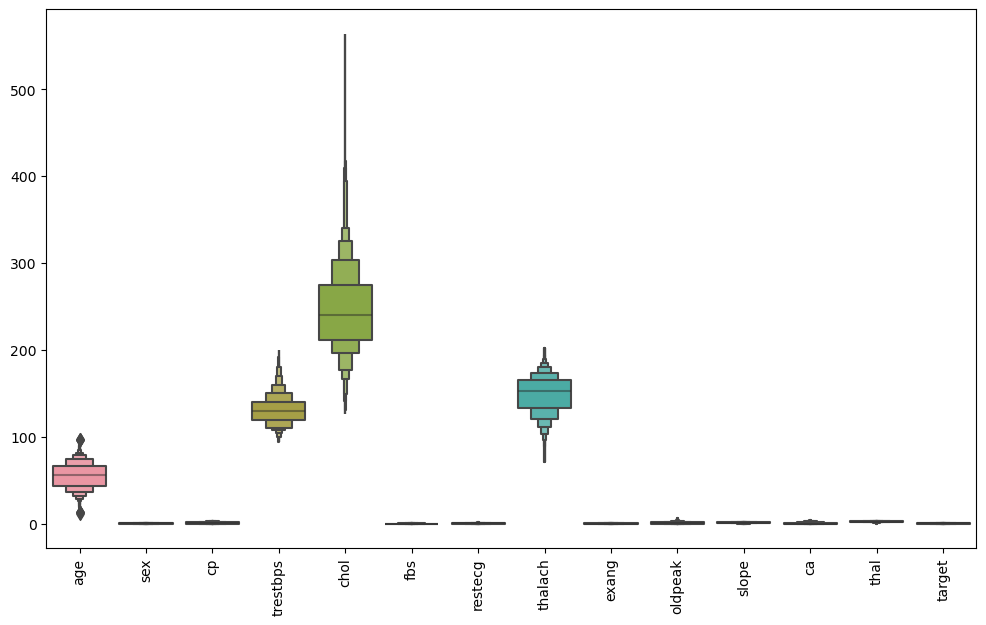

In [22]:
plt.figure(figsize=(12,7))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,26058.0,55.655730,15.190407,11.0,44.0,56.0,67.0,98.0
sex,26058.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0
cp,26058.0,0.956635,1.022467,0.0,0.0,1.0,2.0,3.0
trestbps,26058.0,131.590682,17.597086,94.0,120.0,130.0,140.0,200.0
chol,26058.0,246.286591,51.651701,126.0,211.0,240.0,275.0,564.0
fbs,26058.0,0.149896,0.356977,0.0,0.0,0.0,0.0,1.0
restecg,26058.0,0.526057,0.525688,0.0,0.0,1.0,1.0,2.0
thalach,26058.0,149.643181,22.865871,71.0,133.0,153.0,166.0,202.0
exang,26058.0,0.326886,0.469084,0.0,0.0,0.0,1.0,1.0
oldpeak,26058.0,1.039742,1.165673,0.0,0.0,0.8,1.6,6.2


In [24]:
df.shape

(26058, 14)

In [25]:
print('mean of chol: ',df.chol.mean())

mean of chol:  246.28659144984266


In [27]:
df = df[(df["chol"]<400.0)&(df["chol"]>-2.0)]

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

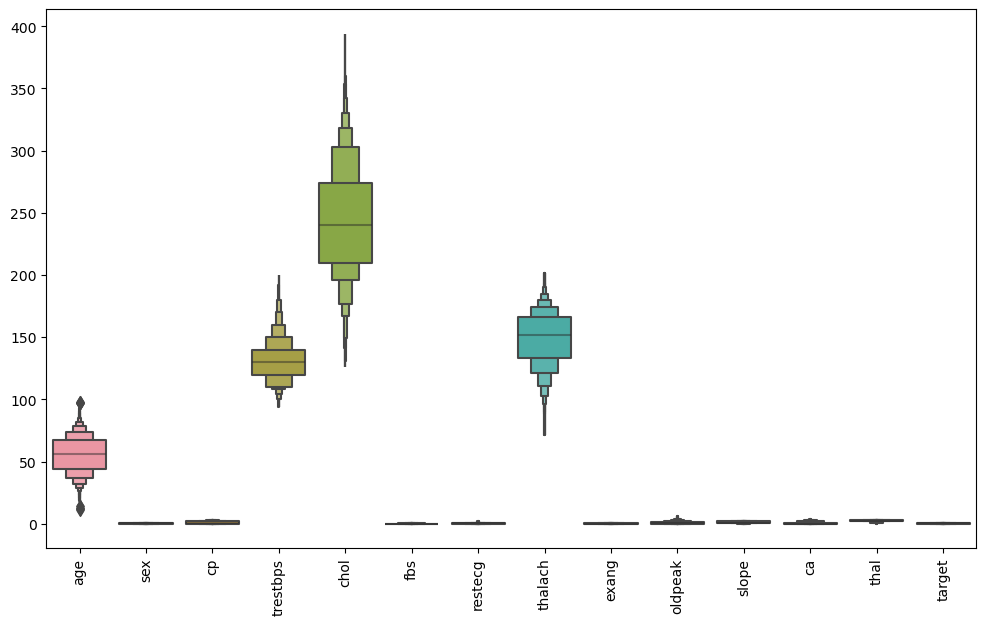

In [28]:
plt.figure(figsize=(12,7))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

In [29]:
x = df.drop('target', axis=1)
y = df['target']

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
rf_model = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=10,max_leaf_nodes= 80,n_estimators = 30)
dt_model = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30)
logistic_model = LogisticRegression()

In [32]:
rf_model.fit(xtrain, ytrain)
dt_model.fit(xtrain, ytrain)
logistic_model.fit(xtrain, ytrain)

C:\Users\Aakash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
rf_score = rf_model.score(xtest, ytest)
dt_score = dt_model.score(xtest, ytest)
logistic_score = logistic_model.score(xtest, ytest)

In [34]:
print('Random Forest Classifier Score : ', rf_score)
print('Decission Tree Classifier Score : ', dt_score)
print('Logistic Regression Score : ', logistic_score)

Random Forest Classifier Score :  0.9972783825816485
Decission Tree Classifier Score :  0.9492612752721618
Logistic Regression Score :  0.8423405909797823


In [35]:
y_pred = dt_model.predict(xtest)

<Axes: >

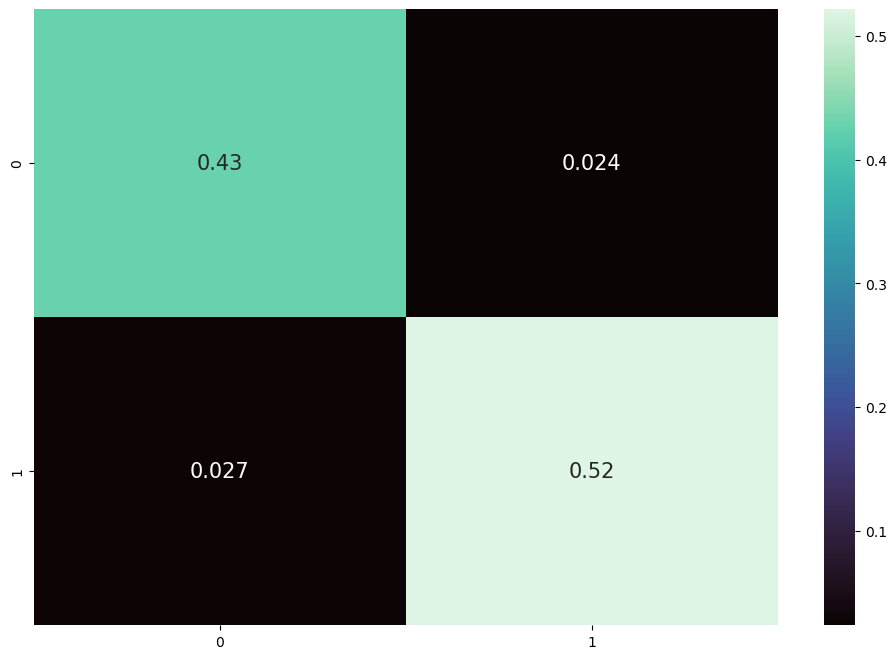

In [36]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = 'mako', annot = True, annot_kws = {'size':15})

In [37]:
import pickle

# Assuming 'model' is the trained RandomForestRegressor
with open('hypertension_dtmodel.pkl', 'wb') as file:
    pickle.dump(dt_model, file)